In [291]:
from skimage import color, io, measure, img_as_ubyte
from skimage.measure import profile_line
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt
import numpy as np
import pydicom as dicom

**Exercise 1:** *Start by reading the image:*

In [292]:
# Directory containing data and images
in_dir = "data/"

# X-ray image
im_name = "metacarpals.png"

# Read the image.
# Here the directory and the image name is concatenated
# by "+" to give the full path to the image.
im_org = io.imread(in_dir + im_name)

**Exercise 2:** *Check the image dimensions:*

In [293]:
print(im_org.shape)

(512, 512)


**Exercise 3:** *Check the pixel type (unsigned int, boolean, double or something else):*

In [294]:
print(im_org.dtype)

float32


**Exercise 4:** *Display the image and try to use the simple viewer tools like the **zoom** tool to inspect the finger bones. You can see the pixel values at a given pixel position (in x, y coordinates) in the upper right corner. Where do you see the highest and lowest pixel values?*

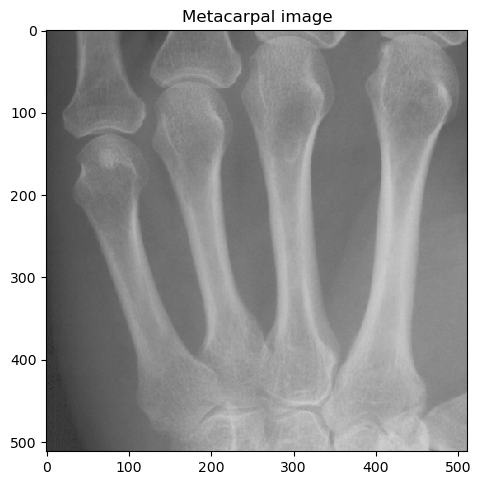

In [295]:
io.imshow(im_org)
plt.title('Metacarpal image')
io.show()

**Exercise 6:** *Experiment with different colormaps. For example cool, hot, pink, copper, coolwarm, cubehelix, and terrain.*

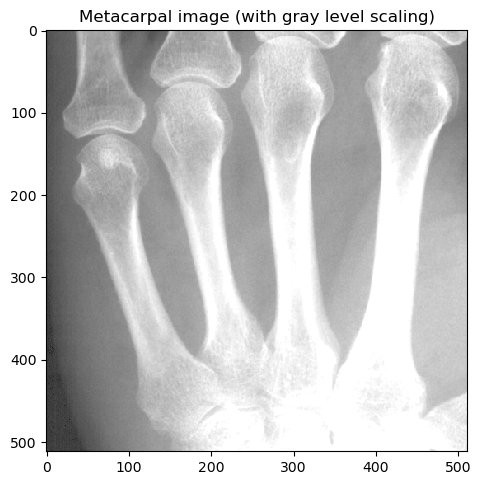

In [296]:
# io.imshow(im_org)
io.imshow(im_org, vmin=20/255, vmax=170/255)
plt.title('Metacarpal image (with gray level scaling)')
io.show()

**Exercise 7:** *Try to find a way to automatically scale the visualization, so the pixel with the lowest value in the image is shown as black and the pixel with the highest value in the image is shown as white.*

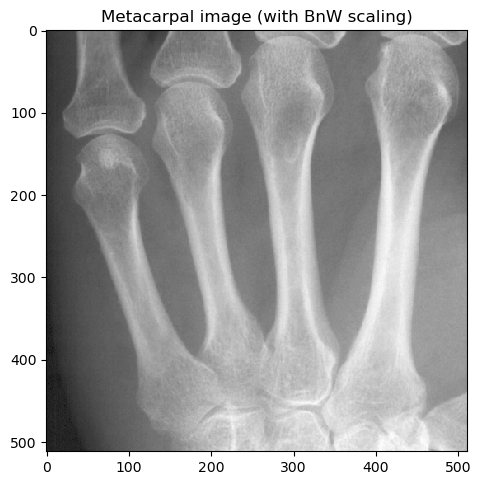

In [297]:
io.imshow(im_org, vmin=np.min(im_org), vmax=np.max(im_org))
plt.title('Metacarpal image (with BnW scaling)')
io.show()

**Exercise 8:** *Compute and visualise the histogram of the image:*

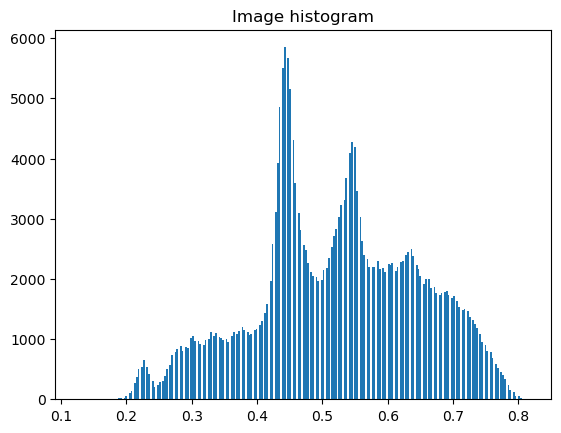

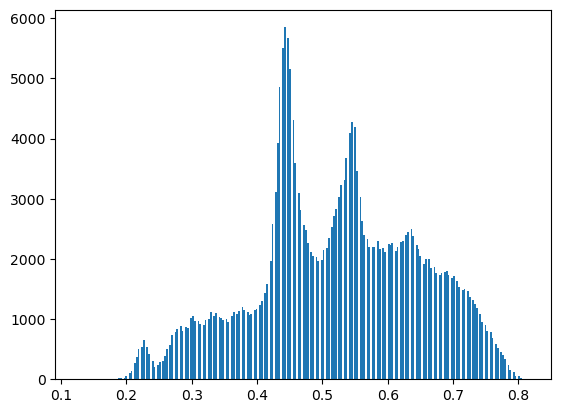

In [298]:
# METHOD 1
plt.hist(im_org.ravel(), bins=256)
plt.title('Image histogram')
io.show()
# METHOD 2
y, x, _ = plt.hist(im_org.ravel(), bins=256)

**Exercise 9:** *Use the histogram function to find the most common range of intensities? (hint: you can use the list functions `max` and `argmax`).*

In [299]:
r = 100
c = 50
im_val = im_org[r, c]
print(f"The pixel value at (r,c) = ({r}, {c}) is: {im_val}")

The pixel value at (r,c) = (100, 50) is: 0.42352941632270813


**Exercise 10:** *What is the pixel value at (r, c) = (110, 90) ?*


In [300]:
r = 110
c = 90
im_val = im_org[r, c]
print(f"The pixel value at (r,c) = ({r}, {c}) is: {im_val}")

The pixel value at (r,c) = (110, 90) is: 0.47058823704719543


**Exercise 11:** *What does this operation do?*

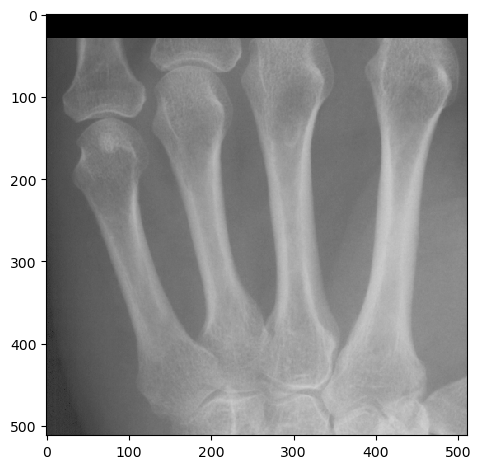

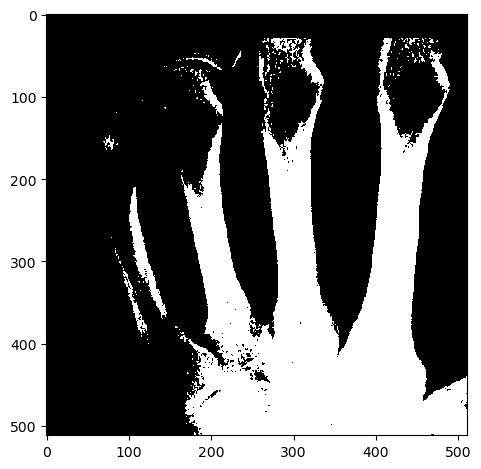

In [301]:
# Slicing
im_org[:30] = 0
io.imshow(im_org)
io.show()

# masking
mask = im_org > (150/255)
io.imshow(mask)
io.show()

**Exercise 12:** *Where are the values 1 and where are they 0?*

In [302]:
print(mask)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]]


**Exercise 13:** *What does this piece of code do?*

c:\Users\minni\anaconda3\envs\course02502\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


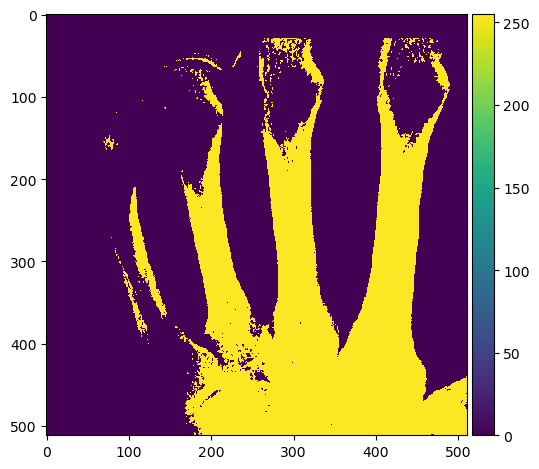

In [303]:
im_org[mask] = 255
io.imshow(im_org)
io.show()

**Exercise 14:** *Read the image and print the image dimensions and its pixel type. How many rows and columns do the image have?*

In [304]:
new_name = "ardeche.jpg"
new_org = io.imread(in_dir + new_name)
print(new_org)

[[[ 75 145 217]
  [ 76 146 218]
  [ 76 146 216]
  ...
  [ 15  25  34]
  [ 23  35  51]
  [ 40  50  75]]

 [[ 76 146 218]
  [ 76 146 218]
  [ 77 147 217]
  ...
  [ 15  27  27]
  [  5  18  26]
  [ 13  25  37]]

 [[ 77 145 218]
  [ 78 146 219]
  [ 78 146 217]
  ...
  [ 14  28  15]
  [ 27  40  31]
  [ 12  27  22]]

 ...

 [[ 46  55  62]
  [ 34  43  50]
  [ 58  65  71]
  ...
  [ 93  72  53]
  [ 85  68  38]
  [ 74  58  22]]

 [[ 45  54  63]
  [ 45  54  63]
  [ 41  50  57]
  ...
  [120  98  75]
  [107  86  55]
  [ 79  61  23]]

 [[ 44  52  63]
  [ 36  44  55]
  [ 35  44  51]
  ...
  [109  85  59]
  [108  85  51]
  [ 93  71  30]]]


**Exercise 15:** *What are the (R, G, B) pixel values at (r, c) = (110, 90)?*

In [305]:
r = 110
c = 90
print(new_org[r, c])

[119 178 238]


**Exercise 16:** *Try to use NumPy slicing to color the upper half of the photo green.*

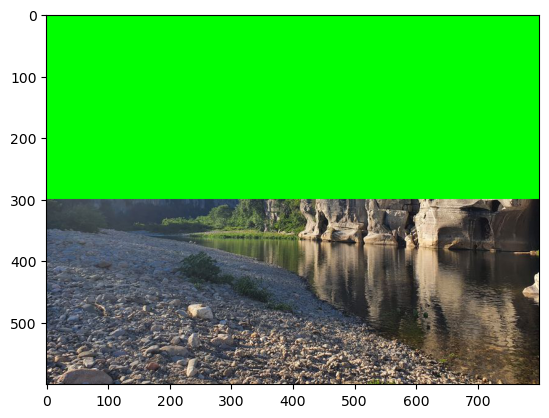

In [336]:
row = new_org.shape[0]
row = row // 2
green_new_org = np.copy(new_org)
plt.imshow(green_new_org)
green_new_org[:row] = [0, 255, 0]
plt.imshow(green_new_org)

**Exercise 17:** *Start by reading the image and examine the size of it.* 

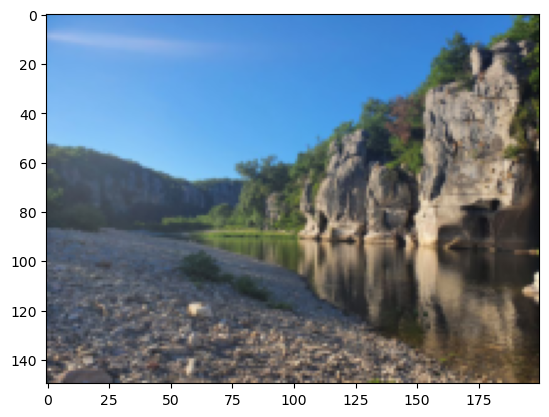

In [338]:
image_rescaled = rescale(new_org, 0.25, anti_aliasing=True,
                         channel_axis=2)
plt.imshow(image_rescaled)

**Exercise 18:** *What is the type of the pixels after rescaling? Try to show the image and inspect the pixel values. Are they still in the range of [0, 255]?*

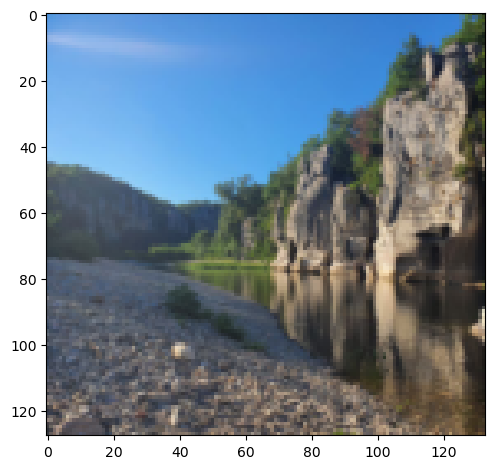

In [348]:
image_resized = resize(new_org, (im_org.shape[0] // 4,
                       new_org.shape[1] // 6),
                       anti_aliasing=True)
io.imshow(image_resized)

**Exercise 19:** *Try to find a way to automatically scale your image so the resulting width (number of columns) is always equal to 400, no matter the size of the input image?*

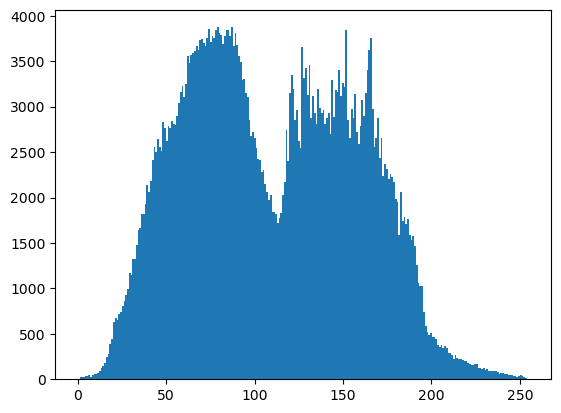

In [358]:
im_gray = color.rgb2gray(new_org)
im_byte = img_as_ubyte(im_gray)
y, x, _ = plt.hist(im_byte.ravel(), bins=256)


**Exercise 20:** *Take an image that is very dark and another very light image. Compute and visualise the histograms for the two images. Explain the difference between the two.*

**Exercise 21:** *Take an image with a bright object on a dark background. Compute and visualise the histograms for the image. Can you recognise the object and the background in the histogram?*

**Exercise 22:** *Start by reading and showing the **DTUSign1.jpg** image.*

**Exercise 23:** *Visualize the R, G, and B components individually. Why does the DTU Compute sign look bright on the R channel image and dark on the G and B channels?  Why do the walls of the building look bright in all channels?*

**Exercise 24:** *Start by reading and showing the **DTUSign1.jpg** image.* 

**Exercise 25:** *Show the image again and save it to disk as **DTUSign1-marked.jpg** using the `io.imsave` function. Try to save the image using different image formats like for example PNG.*